# Overview of Pandas and Xarray groupby(), resample()

### let's load all the libraries we need.

In [33]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline


## Get some data : tornado reports

## read the csv file - check out the options

In [34]:
! cp /home/pangeo/Advanced-notebooks/1950-2016_all_tornadoes.csv .
d = pd.read_csv('1950-2016_all_tornadoes.csv', delimiter=',', header=0)
d.head()

om    yr  mo  dy    date      time  timezone state  stateFIPS  StateNumber  \
0   1  1950   1   3  1/3/50  11:00:00         3    MO         29            1   
1   1  1950   1   3  1/3/50  11:00:00         3    MO         29            1   
2   1  1950   1   3  1/3/50  11:10:00         3    IL         17            1   
3   2  1950   1   3  1/3/50  11:55:00         3    IL         17            2   
4   3  1950   1   3  1/3/50  16:00:00         3    OH         39            1   

  ...  lenghtmiles  widthyards  ns  sn  sg  fips1  fips2  fips3  fips4  fc  
0 ...          9.5       150.0   2   0   1      0      0      0      0   0  
1 ...          6.2       150.0   2   1   2    189      0      0      0   0  
2 ...          3.3       100.0   2   1   2    119      0      0      0   0  
3 ...          3.6       130.0   1   1   1    135      0      0      0   0  
4 ...          0.1        10.0   1   1   1    161      0      0      0   0  

[5 rows x 29 columns]

what object do I have now? always check the type

In [35]:
type(d)

pandas.core.frame.DataFrame

In [36]:
pd.read_csv?

Signature: pd.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)
Docstring:
Read CSV (comma-separated) file

### I can tell read_csv to parse some columns and create a time index

In [37]:
d = pd.read_csv('1950-2016_all_tornadoes.csv', 
                delimiter=',',
                header=0,
                error_bad_lines=False, 
                parse_dates=[[1,2,3,5]], 
                keep_date_col=True)
d.head()

yr_mo_dy_time  om    yr mo dy    date      time  timezone state  \
0 1950-01-03 11:00:00   1  1950  1  3  1/3/50  11:00:00         3    MO   
1 1950-01-03 11:00:00   1  1950  1  3  1/3/50  11:00:00         3    MO   
2 1950-01-03 11:10:00   1  1950  1  3  1/3/50  11:10:00         3    IL   
3 1950-01-03 11:55:00   2  1950  1  3  1/3/50  11:55:00         3    IL   
4 1950-01-03 16:00:00   3  1950  1  3  1/3/50  16:00:00         3    OH   

   stateFIPS ...  lenghtmiles  widthyards  ns  sn  sg  fips1  fips2  fips3  \
0         29 ...          9.5       150.0   2   0   1      0      0      0   
1         29 ...          6.2       150.0   2   1   2    189      0      0   
2         17 ...          3.3       100.0   2   1   2    119      0      0   
3         17 ...          3.6       130.0   1   1   1    135      0      0   
4         39 ...          0.1        10.0   1   1   1    161      0      0   

   fips4  fc  
0      0   0  
1      0   0  
2      0   0  
3      0   0  
4      0   0  

[5 rows x 30 columns]

In [38]:
d.keys()

Index(['yr_mo_dy_time', 'om', 'yr', 'mo', 'dy', 'date', 'time', 'timezone',
       'state', 'stateFIPS', 'StateNumber', 'EFscale', 'injuries',
       'fatalities', 'loss', 'croploss', 'startlat', 'startlon', 'endlat',
       'endlon', 'lenghtmiles', 'widthyards', 'ns', 'sn', 'sg', 'fips1',
       'fips2', 'fips3', 'fips4', 'fc'],
      dtype='object')

for simplicity I am "dropping" some columns I won't need (check what inplace=True does in the options)

In [39]:
d.drop(columns=['timezone','stateFIPS', 'StateNumber','croploss','ns', 'sn','fips1', 'fips2', 'fips3', 'fips4','fc'], 
       inplace=True)
d.head()

yr_mo_dy_time  om    yr mo dy    date      time state  EFscale  \
0 1950-01-03 11:00:00   1  1950  1  3  1/3/50  11:00:00    MO        3   
1 1950-01-03 11:00:00   1  1950  1  3  1/3/50  11:00:00    MO        3   
2 1950-01-03 11:10:00   1  1950  1  3  1/3/50  11:10:00    IL        3   
3 1950-01-03 11:55:00   2  1950  1  3  1/3/50  11:55:00    IL        3   
4 1950-01-03 16:00:00   3  1950  1  3  1/3/50  16:00:00    OH        1   

   injuries  fatalities  loss  startlat  startlon  endlat  endlon  \
0         3           0   6.0     38.77    -90.22   38.83  -90.03   
1         3           0   6.0     38.77    -90.22   38.82  -90.12   
2         0           0   5.0     38.82    -90.12   38.83  -90.03   
3         3           0   5.0     39.10    -89.30   39.12  -89.23   
4         1           0   4.0     40.88    -84.58    0.00    0.00   

   lenghtmiles  widthyards  sg  
0          9.5       150.0   1  
1          6.2       150.0   2  
2          3.3       100.0   2  
3          3.6       130.0   1  
4          0.1        10.0   1

In [40]:
d.shape

(62208, 19)

### Useful commands to always run to check on how the data were loaded

In [41]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62208 entries, 0 to 62207
Data columns (total 19 columns):
yr_mo_dy_time    62208 non-null datetime64[ns]
om               62208 non-null int64
yr               62208 non-null object
mo               62208 non-null object
dy               62208 non-null object
date             62208 non-null object
time             62208 non-null object
state            62208 non-null object
EFscale          62208 non-null int64
injuries         62208 non-null int64
fatalities       62208 non-null int64
loss             62208 non-null float64
startlat         62208 non-null float64
startlon         62208 non-null float64
endlat           62208 non-null float64
endlon           62208 non-null float64
lenghtmiles      62208 non-null float64
widthyards       62208 non-null float64
sg               62208 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(5), object(6)
memory usage: 9.0+ MB


#### some of the variables were loaded as objects although - except for a few - they are all numbers.
#### quick way to convert them is the following

In [44]:
d = d.convert_objects(convert_numeric=True)
d.info()

/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62208 entries, 0 to 62207
Data columns (total 19 columns):
yr_mo_dy_time    62208 non-null datetime64[ns]
om               62208 non-null int64
yr               62208 non-null int64
mo               62208 non-null int64
dy               62208 non-null int64
date             62208 non-null object
time             62208 non-null object
state            62208 non-null object
EFscale          62208 non-null int64
injuries         62208 non-null int64
fatalities       62208 non-null int64
loss             62208 non-null float64
startlat         62208 non-null float64
startlon         62208 non-null float64
endlat           62208 non-null float64
endlon           62208 non-null float64
lenghtmiles      62208 non-null float64
widthyards       62208 non-null float64
sg               62208 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(8), object(3)
memory usage: 9.0+ MB


#### .describe() gives an overview of the data
look at EFscale (tornado intensity), there are some negative intensity values, I will want to exclude those values

In [45]:
d.describe()

om            yr            mo            dy       EFscale  \
count   62208.000000  62208.000000  62208.000000  62208.000000  62208.000000   
mean    50792.725244   1988.445377      5.958333     15.920203      0.810041   
std    148896.678355     18.030652      2.399363      8.753624      0.958461   
min         1.000000   1950.000000      1.000000      1.000000     -9.000000   
25%       250.000000   1974.000000      4.000000      8.000000      0.000000   
50%       517.000000   1991.000000      6.000000     16.000000      1.000000   
75%       870.000000   2004.000000      7.000000     24.000000      1.000000   
max    614471.000000   2016.000000     12.000000     31.000000      5.000000   

           injuries    fatalities          loss      startlat      startlon  \
count  62208.000000  62208.000000  6.220800e+04  62208.000000  62208.000000   
mean       1.727045      0.110420  3.025265e+03     37.094252    -92.739393   
std       21.132596      1.673987  1.436459e+05      5.351269      9.583915   
min        0.000000      0.000000  0.000000e+00      0.000000   -163.530000   
25%        0.000000      0.000000  0.000000e+00     33.250000    -98.550000   
50%        0.000000      0.000000  1.000000e-01     37.080000    -93.850000   
75%        0.000000      0.000000  4.000000e+00     40.950000    -86.800000   
max     1740.000000    158.000000  2.200000e+07     61.020000      0.000000   

             endlat        endlon   lenghtmiles    widthyards            sg  
count  62208.000000  62208.000000  62208.000000  62208.000000  62208.000000  
mean      21.441005    -53.056681      3.626159    103.031928      0.996367  
std       18.835747     46.140667      8.843966    204.301575      0.460527  
min        0.000000   -163.530000      0.000000      0.000000     -9.000000  
25%        0.000000    -94.400000      0.100000     17.000000      1.000000  
50%       31.670000    -82.520000      0.700000     40.000000      1.000000  
75%       38.302250      0.000000      3.000000    100.000000      1.000000  
max       61.020000      0.000000    234.700000   4576.000000      2.000000

#### Accessing columns/rows can be simple or tricky depending on how complicated it is.
#### In general, columns can be accessed "attribute style" or through the key names
Attribute style , with the "dot" and the name = .EFscale

In [46]:
d.EFscale.head()

0    3
1    3
2    3
3    3
4    1
Name: EFscale, dtype: int64

using the keys, which are essentialy the labels of the columns (depending on the method/function you are using, labels, columns, keys are often referred to the column name, always read the help)

In [47]:
d.keys()

Index(['yr_mo_dy_time', 'om', 'yr', 'mo', 'dy', 'date', 'time', 'state',
       'EFscale', 'injuries', 'fatalities', 'loss', 'startlat', 'startlon',
       'endlat', 'endlon', 'lenghtmiles', 'widthyards', 'sg'],
      dtype='object')

In [48]:
d['EFscale'].head()

0    3
1    3
2    3
3    3
4    1
Name: EFscale, dtype: int64

let's tell python to exclude those negative EFscale - note, I use the attribute style access of column EFscale

In [49]:
d = d[d.EFscale>-1]

d.describe()

om            yr            mo            dy       EFscale  \
count   62178.000000  62178.000000  62178.000000  62178.000000  62178.000000   
mean    50520.979076   1988.432082      5.958474     15.919602      0.814774   
std    148417.614555     18.024837      2.399709      8.753490      0.934149   
min         1.000000   1950.000000      1.000000      1.000000      0.000000   
25%       250.000000   1974.000000      4.000000      8.000000      0.000000   
50%       517.000000   1991.000000      6.000000     16.000000      1.000000   
75%       869.000000   2004.000000      7.000000     24.000000      1.000000   
max    614471.000000   2016.000000     12.000000     31.000000      5.000000   

           injuries    fatalities          loss      startlat      startlon  \
count  62178.000000  62178.000000  6.217800e+04  62178.000000  62178.000000   
mean       1.727878      0.110473  3.026725e+03     37.094487    -92.736289   
std       21.137659      1.674389  1.436805e+05      5.352146      9.583638   
min        0.000000      0.000000  0.000000e+00      0.000000   -163.530000   
25%        0.000000      0.000000  0.000000e+00     33.250000    -98.550000   
50%        0.000000      0.000000  1.000000e-01     37.080000    -93.840000   
75%        0.000000      0.000000  4.000000e+00     40.950000    -86.800000   
max     1740.000000    158.000000  2.200000e+07     61.020000      0.000000   

             endlat        endlon   lenghtmiles    widthyards            sg  
count  62178.000000  62178.000000  62178.000000  62178.000000  62178.000000  
mean      21.433684    -53.034435      3.627471    103.054202      0.996365  
std       18.837227     46.140357      8.845853    204.345808      0.460638  
min        0.000000   -163.530000      0.000000      0.000000     -9.000000  
25%        0.000000    -94.382950      0.100000     17.000000      1.000000  
50%       31.657300    -82.500000      0.700000     40.000000      1.000000  
75%       38.300300      0.000000      3.010000    100.000000      1.000000  
max       61.020000      0.000000    234.700000   4576.000000      2.000000

the column sg identifies full track tornadoes, for my analysis I want only those, so once again I will exclude the other values

note I use the keys access to get my column sg

In [50]:
d['sg']==1

0         True
1        False
2        False
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24       False
25        True
26        True
27        True
28        True
29        True
         ...  
62178     True
62179     True
62180     True
62181     True
62182     True
62183     True
62184     True
62185     True
62186     True
62187     True
62188     True
62189     True
62190     True
62191     True
62192     True
62193     True
62194     True
62195     True
62196     True
62197     True
62198     True
62199     True
62200     True
62201     True
62202     True
62203     True
62204     True
62205     True
62206     True
62207     True
Name: sg, Length: 62178, dtype: bool

In [51]:
d = d[ d['sg']==1]
d.startlat.describe()

count    61062.000000
mean        37.159091
std          5.123198
min         18.130000
25%         33.245400
50%         37.100000
75%         40.970000
max         61.020000
Name: startlat, dtype: float64

### let's rename the column with the parsed dates

In [52]:
d = d.rename(index=str, columns={"yr_mo_dy_time": "date_time"})
d.head()

date_time  om    yr  mo  dy     date      time state  EFscale  \
0 1950-01-03 11:00:00   1  1950   1   3   1/3/50  11:00:00    MO        3   
3 1950-01-03 11:55:00   2  1950   1   3   1/3/50  11:55:00    IL        3   
4 1950-01-03 16:00:00   3  1950   1   3   1/3/50  16:00:00    OH        1   
5 1950-01-13 05:25:00   4  1950   1  13  1/13/50   5:25:00    AR        3   
6 1950-01-25 19:30:00   5  1950   1  25  1/25/50  19:30:00    MO        2   

   injuries  fatalities  loss  startlat  startlon  endlat  endlon  \
0         3           0   6.0     38.77    -90.22   38.83  -90.03   
3         3           0   5.0     39.10    -89.30   39.12  -89.23   
4         1           0   4.0     40.88    -84.58    0.00    0.00   
5         1           1   3.0     34.40    -94.37    0.00    0.00   
6         5           0   5.0     37.60    -90.68   37.63  -90.65   

   lenghtmiles  widthyards  sg  
0          9.5       150.0   1  
3          3.6       130.0   1  
4          0.1        10.0   1  
5          0.6        17.0   1  
6          2.3       300.0   1

### let's set the date_time column as an index

note - when you transform a column in an index, that column is lost from the dataframe

In [53]:
d.set_index(keys='date_time', inplace=True)
d.head()

om    yr  mo  dy     date      time state  EFscale  \
date_time                                                                 
1950-01-03 11:00:00   1  1950   1   3   1/3/50  11:00:00    MO        3   
1950-01-03 11:55:00   2  1950   1   3   1/3/50  11:55:00    IL        3   
1950-01-03 16:00:00   3  1950   1   3   1/3/50  16:00:00    OH        1   
1950-01-13 05:25:00   4  1950   1  13  1/13/50   5:25:00    AR        3   
1950-01-25 19:30:00   5  1950   1  25  1/25/50  19:30:00    MO        2   

                     injuries  fatalities  loss  startlat  startlon  endlat  \
date_time                                                                     
1950-01-03 11:00:00         3           0   6.0     38.77    -90.22   38.83   
1950-01-03 11:55:00         3           0   5.0     39.10    -89.30   39.12   
1950-01-03 16:00:00         1           0   4.0     40.88    -84.58    0.00   
1950-01-13 05:25:00         1           1   3.0     34.40    -94.37    0.00   
1950-01-25 19:30:00         5           0   5.0     37.60    -90.68   37.63   

                     endlon  lenghtmiles  widthyards  sg  
date_time                                                 
1950-01-03 11:00:00  -90.03          9.5       150.0   1  
1950-01-03 11:55:00  -89.23          3.6       130.0   1  
1950-01-03 16:00:00    0.00          0.1        10.0   1  
1950-01-13 05:25:00    0.00          0.6        17.0   1  
1950-01-25 19:30:00  -90.65          2.3       300.0   1

# Q. does index need to be unique?

short answer, no. They are "tolerated" but I think they have some limits. 

let's first "reset_index" because I don't want to loose my date_time column

In [57]:
d.reset_index(inplace=True)
d.head()

EFscale           date_time  om    yr  mo  dy     date      time state  \
0        3 1950-01-03 11:00:00   1  1950   1   3   1/3/50  11:00:00    MO   
1        3 1950-01-03 11:55:00   2  1950   1   3   1/3/50  11:55:00    IL   
2        1 1950-01-03 16:00:00   3  1950   1   3   1/3/50  16:00:00    OH   
3        3 1950-01-13 05:25:00   4  1950   1  13  1/13/50   5:25:00    AR   
4        2 1950-01-25 19:30:00   5  1950   1  25  1/25/50  19:30:00    MO   

   injuries  fatalities  loss  startlat  startlon  endlat  endlon  \
0         3           0   6.0     38.77    -90.22   38.83  -90.03   
1         3           0   5.0     39.10    -89.30   39.12  -89.23   
2         1           0   4.0     40.88    -84.58    0.00    0.00   
3         1           1   3.0     34.40    -94.37    0.00    0.00   
4         5           0   5.0     37.60    -90.68   37.63  -90.65   

   lenghtmiles  widthyards  sg  
0          9.5       150.0   1  
1          3.6       130.0   1  
2          0.1        10.0   1  
3          0.6        17.0   1  
4          2.3       300.0   1

In [58]:
d.set_index(keys='EFscale', inplace=True)

In [59]:
d.head()

date_time  om    yr  mo  dy     date      time state  \
EFscale                                                                  
3       1950-01-03 11:00:00   1  1950   1   3   1/3/50  11:00:00    MO   
3       1950-01-03 11:55:00   2  1950   1   3   1/3/50  11:55:00    IL   
1       1950-01-03 16:00:00   3  1950   1   3   1/3/50  16:00:00    OH   
3       1950-01-13 05:25:00   4  1950   1  13  1/13/50   5:25:00    AR   
2       1950-01-25 19:30:00   5  1950   1  25  1/25/50  19:30:00    MO   

         injuries  fatalities  loss  startlat  startlon  endlat  endlon  \
EFscale                                                                   
3               3           0   6.0     38.77    -90.22   38.83  -90.03   
3               3           0   5.0     39.10    -89.30   39.12  -89.23   
1               1           0   4.0     40.88    -84.58    0.00    0.00   
3               1           1   3.0     34.40    -94.37    0.00    0.00   
2               5           0   5.0     37.60    -90.68   37.63  -90.65   

         lenghtmiles  widthyards  sg  
EFscale                               
3                9.5       150.0   1  
3                3.6       130.0   1  
1                0.1        10.0   1  
3                0.6        17.0   1  
2                2.3       300.0   1

more info here 
https://stackoverflow.com/questions/16626058/what-is-the-performance-impact-of-non-unique-indexes-in-pandas

let's go back to the dataframe with date_time as index

In [60]:
d.reset_index(inplace=True)
d.set_index(keys='date_time', inplace=True)
d.head()

EFscale  om    yr  mo  dy     date      time state  \
date_time                                                                 
1950-01-03 11:00:00        3   1  1950   1   3   1/3/50  11:00:00    MO   
1950-01-03 11:55:00        3   2  1950   1   3   1/3/50  11:55:00    IL   
1950-01-03 16:00:00        1   3  1950   1   3   1/3/50  16:00:00    OH   
1950-01-13 05:25:00        3   4  1950   1  13  1/13/50   5:25:00    AR   
1950-01-25 19:30:00        2   5  1950   1  25  1/25/50  19:30:00    MO   

                     injuries  fatalities  loss  startlat  startlon  endlat  \
date_time                                                                     
1950-01-03 11:00:00         3           0   6.0     38.77    -90.22   38.83   
1950-01-03 11:55:00         3           0   5.0     39.10    -89.30   39.12   
1950-01-03 16:00:00         1           0   4.0     40.88    -84.58    0.00   
1950-01-13 05:25:00         1           1   3.0     34.40    -94.37    0.00   
1950-01-25 19:30:00         5           0   5.0     37.60    -90.68   37.63   

                     endlon  lenghtmiles  widthyards  sg  
date_time                                                 
1950-01-03 11:00:00  -90.03          9.5       150.0   1  
1950-01-03 11:55:00  -89.23          3.6       130.0   1  
1950-01-03 16:00:00    0.00          0.1        10.0   1  
1950-01-13 05:25:00    0.00          0.6        17.0   1  
1950-01-25 19:30:00  -90.65          2.3       300.0   1

### this allows us to access the data based on the date value

In [61]:
d['1960-01-01':'1960-02-01']

EFscale  om    yr  mo  dy     date      time state  \
date_time                                                                 
1960-01-12 14:20:00        1   1  1960   1  12  1/12/60  14:20:00    MO   
1960-01-14 01:30:00        0   2  1960   1  14  1/14/60   1:30:00    TX   
1960-01-14 06:00:00        2   3  1960   1  14  1/14/60   6:00:00    OK   
1960-01-14 06:35:00        1   4  1960   1  14  1/14/60   6:35:00    TX   
1960-01-14 07:45:00        2   5  1960   1  14  1/14/60   7:45:00    TX   
1960-01-14 11:20:00        0   6  1960   1  14  1/14/60  11:20:00    LA   
1960-01-14 12:15:00        1   7  1960   1  14  1/14/60  12:15:00    AR   
1960-01-28 09:40:00        1   8  1960   1  28  1/28/60   9:40:00    TX   
1960-01-29 06:00:00        1   9  1960   1  29  1/29/60   6:00:00    AL   

                     injuries  fatalities  loss  startlat  startlon  endlat  \
date_time                                                                     
1960-01-12 14:20:00         0           0   4.0     40.27    -94.90   40.28   
1960-01-14 01:30:00         0           0   3.0     32.77   -100.88    0.00   
1960-01-14 06:00:00         0           0   3.0     34.70    -96.80    0.00   
1960-01-14 06:35:00         3           0   5.0     33.72    -96.68    0.00   
1960-01-14 07:45:00         1           0   3.0     33.13    -95.82    0.00   
1960-01-14 11:20:00         0           0   4.0     32.47    -93.75   32.52   
1960-01-14 12:15:00         0           0   3.0     35.18    -92.45   35.23   
1960-01-28 09:40:00         0           0   3.0     29.83    -93.83    0.00   
1960-01-29 06:00:00         0           0   3.0     30.63    -88.10    0.00   

                     endlon  lenghtmiles  widthyards  sg  
date_time                                                 
1960-01-12 14:20:00  -94.88          0.1        17.0   1  
1960-01-14 01:30:00    0.00          2.0        33.0   1  
1960-01-14 06:00:00    0.00          0.1        10.0   1  
1960-01-14 06:35:00    0.00          0.2        17.0   1  
1960-01-14 07:45:00    0.00          0.3        33.0   1  
1960-01-14 11:20:00  -93.70          4.5        20.0   1  
1960-01-14 12:15:00  -92.37          6.1        17.0   1  
1960-01-28 09:40:00    0.00          2.0        33.0   1  
1960-01-29 06:00:00    0.00          0.1        10.0   1

## let's look at groupby

In [62]:
d.groupby?

Signature: d.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)
Docstring:
Group series using mapper (dict or key function, apply given function
to group, return result as series) or by a series of columns.

Parameters
----------
by : mapping, function, str, or iterable
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If an ndarray is passed, the
    values are used as-is determine the groups. A str or list of strs
    may be passed to group by the columns in ``self``
axis : int, default 0
level : int, level name, or sequence of such, default None
    If the axis is a MultiIndex (hierarchical), group by a particular
    level or levels
as_index : boolean, default True
    For aggregated 

## simple examples
### groupby one of the column

what object does groupby create?

In [63]:
d.groupby(by='EFscale')

In [64]:
tempdgroupby = d.groupby(by='EFscale')
tempdgroupby

check all methods and attributes of this object by using tab after the "dot"

In [65]:
tempdgroupby.

SyntaxError: invalid syntax (<ipython-input-65-c4d444490afe>, line 1)

In [66]:
print(tempdgroupby.yr.count())
print(tempdgroupby['yr'].count()) # they are the same thing, just accessed differently

EFscale
0    28464
1    20532
2     9001
3     2439
4      567
5       59
Name: yr, dtype: int64
EFscale
0    28464
1    20532
2     9001
3     2439
4      567
5       59
Name: yr, dtype: int64


#### Let's use count. Note how all the columns reports the same value; we are counting the number of elements for each EFscale, so that makes sense

In [67]:
d.groupby(by='EFscale').count()

om     yr     mo     dy   date   time  state  injuries  \
EFscale                                                              
0        28464  28464  28464  28464  28464  28464  28464     28464   
1        20532  20532  20532  20532  20532  20532  20532     20532   
2         9001   9001   9001   9001   9001   9001   9001      9001   
3         2439   2439   2439   2439   2439   2439   2439      2439   
4          567    567    567    567    567    567    567       567   
5           59     59     59     59     59     59     59        59   

         fatalities   loss  startlat  startlon  endlat  endlon  lenghtmiles  \
EFscale                                                                       
0             28464  28464     28464     28464   28464   28464        28464   
1             20532  20532     20532     20532   20532   20532        20532   
2              9001   9001      9001      9001    9001    9001         9001   
3              2439   2439      2439      2439    2439    2439         2439   
4               567    567       567       567     567     567          567   
5                59     59        59        59      59      59           59   

         widthyards     sg  
EFscale                     
0             28464  28464  
1             20532  20532  
2              9001   9001  
3              2439   2439  
4               567    567  
5                59     59

In [68]:
d['EFscale'].unique()

array([3, 1, 2, 4, 0, 5])

#### Let's use mean, in this case each column does the average of its own values, so they are different. Makes sense.

In [69]:
d.groupby('EFscale').mean()

om           yr        mo         dy    injuries  \
EFscale                                                               
0        59448.680965  1994.092187  6.047499  16.011769    0.028879   
1        49230.933421  1985.964446  5.973992  15.873125    0.340298   
2        28488.726808  1978.967004  5.841351  15.838462    1.753139   
3        30467.735137  1979.856089  5.629766  15.783928    9.490365   
4        30497.179894  1978.964727  5.158730  15.243386   60.911817   
5        39081.152542  1978.067797  5.033898  14.220339  219.593220   

         fatalities          loss   startlat   startlon     endlat     endlon  \
EFscale                                                                         
0          0.000843    448.752269  37.312933 -94.532201  21.350686 -53.638093   
1          0.011202   2579.591146  37.017521 -91.576594  18.828093 -46.031988   
2          0.065770   4854.223861  36.992391 -91.488466  22.560039 -55.188844   
3          0.530545  29044.896049  36.960977 -91.870951  30.826602 -75.818012   
4          4.158730   1781.613437  37.994367 -91.686433  36.121472 -86.281490   
5         22.830508    135.765763  37.800341 -92.675564  37.391363 -90.524105   

         lenghtmiles  widthyards   sg  
EFscale                                
0           1.030091   42.109584  1.0  
1           3.203892   97.540814  1.0  
2           6.965334  177.721142  1.0  
3          14.906080  365.687987  1.0  
4          27.523580  588.860670  1.0  
5          39.007797  839.067797  1.0

In [70]:
d.groupby('EFscale')['fatalities'].max()

EFscale
0      3
1     16
2      9
3     25
4     94
5    158
Name: fatalities, dtype: int64

In [ ]:
d[d['fatalities']==158]

#### Because our index is a DatetimeIndex (and there are ways to transform it into that type if it doesn't happen magically when you load the file) we can use some attributes that are always available for this class 

In [71]:
type(d.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [72]:
d.index

DatetimeIndex(['1950-01-03 11:00:00', '1950-01-03 11:55:00',
               '1950-01-03 16:00:00', '1950-01-13 05:25:00',
               '1950-01-25 19:30:00', '1950-01-25 21:00:00',
               '1950-01-26 18:00:00', '1950-02-11 13:10:00',
               '1950-02-11 13:50:00', '1950-02-11 21:00:00',
               ...
               '2016-12-25 10:51:00', '2016-12-25 10:54:00',
               '2016-12-25 10:58:00', '2016-12-25 11:45:00',
               '2016-12-25 11:50:00', '2016-12-25 12:16:00',
               '2016-12-25 12:24:00', '2016-12-25 13:53:00',
               '2016-12-26 15:08:00', '2016-12-29 02:50:00'],
              dtype='datetime64[ns]', name='date_time', length=61062, freq=None)

In [73]:
d.index.weekday

Int64Index([1, 1, 1, 4, 2, 2, 3, 5, 5, 5,
            ...
            6, 6, 6, 6, 6, 6, 6, 6, 0, 3],
           dtype='int64', name='date_time', length=61062)

In [74]:
d.index.hour

Int64Index([11, 11, 16,  5, 19, 21, 18, 13, 13, 21,
            ...
            10, 10, 10, 11, 11, 12, 12, 13, 15,  2],
           dtype='int64', name='date_time', length=61062)

In [75]:
d.index.day

Int64Index([ 3,  3,  3, 13, 25, 25, 26, 11, 11, 11,
            ...
            25, 25, 25, 25, 25, 25, 25, 25, 26, 29],
           dtype='int64', name='date_time', length=61062)

In [76]:
d.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date_time', length=61062)

In [77]:
d.index.year

Int64Index([1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='date_time', length=61062)

### let's see what is the number of tornado per each weekday

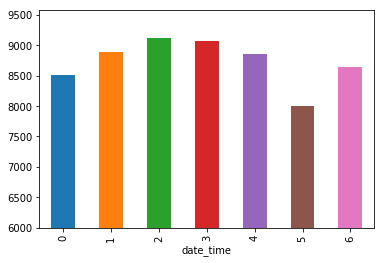

In [78]:
fig, ax = plt.subplots()
d.groupby(d.index.weekday)['EFscale'].count().plot(kind='bar', 
                                                   ax=ax, 
                                                   ylim=6000)

what I did here? I 

generated a groupby object -> d.groupby(d.index.weekday)

extracted a column from it -> d.groupby(d.index.weekday)['EFscale']

applied a method to it     -> d.groupby(d.index.weekday)['EFscale'].count()

and then applied a function-> d.groupby(d.index.weekday)['EFscale'].count().plot(kind='bar', ax=ax, ylim=6000)

I could have split the line in various steps. I could have also plotted the results with matplotlib syntax.
Overall, the function .plot() is more limited in options than the full matplotlib library.
some over the top customization below...

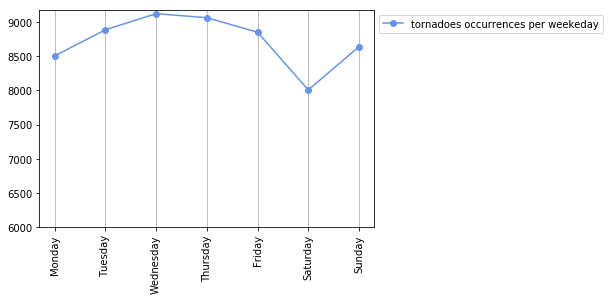

In [79]:
import calendar
fig, ax = plt.subplots()
tempd = d.groupby(d.index.weekday)['EFscale'].count()
ax.plot(tempd, 'o-', color='cornflowerblue', label='tornadoes occurrences per weekeday')
ax.set_xticks(np.arange(0,7))
ax.set_xticklabels(list(calendar.day_name), rotation=90)
ax.set_ylim(bottom=6000)
ax.grid(axis='x')
ax.legend(bbox_to_anchor=[1,1])

### what about the hour of the day

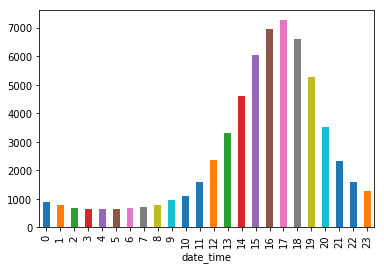

In [80]:
fig, ax = plt.subplots()
d.groupby(d.index.hour)['EFscale'].count().plot(kind='bar', ax=ax)

### what is the average intensity per hour of the day

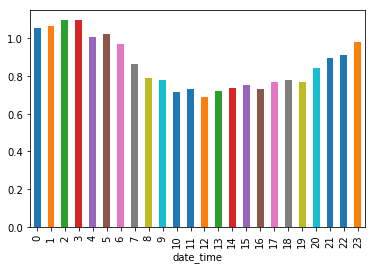

In [81]:
fig, ax = plt.subplots()

groupbyhour = d.groupby(d.index.hour)
getEFscaleoutofthegroup = groupbyhour['EFscale']
calculatethemean = getEFscaleoutofthegroup.mean()
#plot
calculatethemean.plot(kind='bar', ax=ax)

### how about other functions besides .mean() .count()

In [82]:
tempgroupby = d.groupby('EFscale')


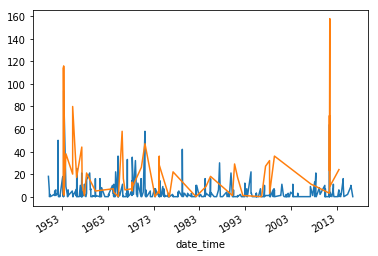

In [85]:
tempgroupby.get_group(4).fatalities.plot()
tempgroupby.get_group(5).fatalities.plot()

### quantile of length of path

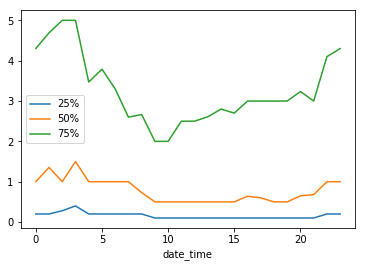

In [86]:
fig, ax = plt.subplots()
# d.groupby(d.index.hour)['widthyards'].max().plot(kind='line', ax=ax)
# d.groupby(d.index.hour)['widthyards'].min().plot(kind='line', ax=ax)

d.groupby(d.index.hour)['lenghtmiles'].quantile(0.25).plot(kind='line', ax=ax, label='25%')
d.groupby(d.index.hour)['lenghtmiles'].quantile(0.5).plot(kind='line', ax=ax, label='50%')
d.groupby(d.index.hour)['lenghtmiles'].quantile(0.75).plot(kind='line', ax=ax, label='75%')
plt.legend()

let's look at the length of tornado path as a function of EFscale

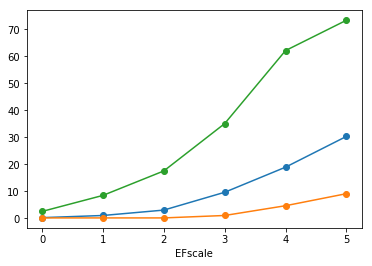

In [87]:
d.groupby(['EFscale'])['lenghtmiles'].quantile(0.5).plot(kind='line',marker='o')
d.groupby(['EFscale'])['lenghtmiles'].quantile(0.1).plot(kind='line',marker='o')
d.groupby(['EFscale'])['lenghtmiles'].quantile(0.9).plot(kind='line',marker='o')

### sometimes the groupby functionalities are available within other functions, usually under the "by=" parameter

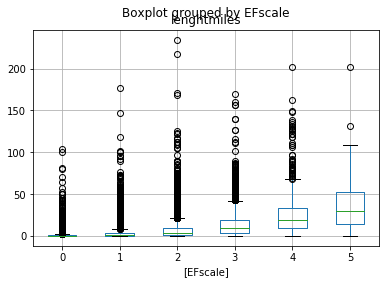

In [88]:
fig, ax = plt.subplots()
d.boxplot(by=['EFscale'], column='lenghtmiles', ax=ax, )

### What if we want to groupby by more than one column?
Note how nicely the print to screen let's you highlight the row as your hover over.

In [89]:
d.groupby(by=['EFscale',d.index.hour]).count().head(15)

om    yr    mo    dy  date  time  state  injuries  \
EFscale date_time                                                        
0       0           255   255   255   255   255   255    255       255   
        1           206   206   206   206   206   206    206       206   
        2           189   189   189   189   189   189    189       189   
        3           179   179   179   179   179   179    179       179   
        4           193   193   193   193   193   193    193       193   
        5           182   182   182   182   182   182    182       182   
        6           230   230   230   230   230   230    230       230   
        7           275   275   275   275   275   275    275       275   
        8           332   332   332   332   332   332    332       332   
        9           421   421   421   421   421   421    421       421   
        10          521   521   521   521   521   521    521       521   
        11          776   776   776   776   776   776    776       776   
        12         1191  1191  1191  1191  1191  1191   1191      1191   
        13         1640  1640  1640  1640  1640  1640   1640      1640   
        14         2279  2279  2279  2279  2279  2279   2279      2279   

                   fatalities  loss  startlat  startlon  endlat  endlon  \
EFscale date_time                                                         
0       0                 255   255       255       255     255     255   
        1                 206   206       206       206     206     206   
        2                 189   189       189       189     189     189   
        3                 179   179       179       179     179     179   
        4                 193   193       193       193     193     193   
        5                 182   182       182       182     182     182   
        6                 230   230       230       230     230     230   
        7                 275   275       275       275     275     275   
        8                 332   332       332       332     332     332   
        9                 421   421       421       421     421     421   
        10                521   521       521       521     521     521   
        11                776   776       776       776     776     776   
        12               1191  1191      1191      1191    1191    1191   
        13               1640  1640      1640      1640    1640    1640   
        14               2279  2279      2279      2279    2279    2279   

                   lenghtmiles  widthyards    sg  
EFscale date_time                                 
0       0                  255         255   255  
        1                  206         206   206  
        2                  189         189   189  
        3                  179         179   179  
        4                  193         193   193  
        5                  182         182   182  
        6                  230         230   230  
        7                  275         275   275  
        8                  332         332   332  
        9                  421         421   421  
        10                 521         521   521  
        11                 776         776   776  
        12                1191        1191  1191  
        13                1640        1640  1640  
        14                2279        2279  2279

### order does matter in the grouping

In [90]:
d.groupby(by=[d.index.hour,'EFscale']).count().head(15)

om   yr   mo   dy  date  time  state  injuries  \
date_time EFscale                                                    
0         0        255  255  255  255   255   255    255       255   
          1        365  365  365  365   365   365    365       365   
          2        203  203  203  203   203   203    203       203   
          3         38   38   38   38    38    38     38        38   
          4          7    7    7    7     7     7      7         7   
1         0        206  206  206  206   206   206    206       206   
          1        355  355  355  355   355   355    355       355   
          2        163  163  163  163   163   163    163       163   
          3         34   34   34   34    34    34     34        34   
          4          8    8    8    8     8     8      8         8   
2         0        189  189  189  189   189   189    189       189   
          1        287  287  287  287   287   287    287       287   
          2        163  163  163  163   163   163    163       163   
          3         42   42   42   42    42    42     42        42   
          4          2    2    2    2     2     2      2         2   

                   fatalities  loss  startlat  startlon  endlat  endlon  \
date_time EFscale                                                         
0         0               255   255       255       255     255     255   
          1               365   365       365       365     365     365   
          2               203   203       203       203     203     203   
          3                38    38        38        38      38      38   
          4                 7     7         7         7       7       7   
1         0               206   206       206       206     206     206   
          1               355   355       355       355     355     355   
          2               163   163       163       163     163     163   
          3                34    34        34        34      34      34   
          4                 8     8         8         8       8       8   
2         0               189   189       189       189     189     189   
          1               287   287       287       287     287     287   
          2               163   163       163       163     163     163   
          3                42    42        42        42      42      42   
          4                 2     2         2         2       2       2   

                   lenghtmiles  widthyards   sg  
date_time EFscale                                
0         0                255         255  255  
          1                365         365  365  
          2                203         203  203  
          3                 38          38   38  
          4                  7           7    7  
1         0                206         206  206  
          1                355         355  355  
          2                163         163  163  
          3                 34          34   34  
          4                  8           8    8  
2         0                189         189  189  
          1                287         287  287  
          2                163         163  163  
          3                 42          42   42  
          4                  2           2    2

let's extract one column of this dataframe - since I am using .count() all columns are identical, i'll pick om.

In [91]:
dd1 = d.groupby(by=[d.index.hour,'EFscale'])['om'].count()#
dd1.head(10)

date_time  EFscale
0          0          255
           1          365
           2          203
           3           38
           4            7
1          0          206
           1          355
           2          163
           3           34
           4            8
Name: om, dtype: int64

In [92]:
dd1.tail()

date_time  EFscale
23         1          568
           2          223
           3           61
           4           13
           5            1
Name: om, dtype: int64

### .unstack() for multiple dimensions indexes

### unstack Pivots a level of the (necessarily hierarchical) index labels, read the help online

In [93]:
dd2 = dd1.unstack()
dd2.head(15)

EFscale         0       1      2      3     4    5
date_time                                         
0           255.0   365.0  203.0   38.0   7.0  NaN
1           206.0   355.0  163.0   34.0   8.0  NaN
2           189.0   287.0  163.0   42.0   2.0  NaN
3           179.0   248.0  156.0   35.0   4.0  NaN
4           193.0   272.0  126.0   30.0   3.0  NaN
5           182.0   290.0  137.0   24.0   4.0  NaN
6           230.0   268.0  138.0   29.0   4.0  NaN
7           275.0   292.0  128.0   21.0   2.0  NaN
8           332.0   288.0  107.0   31.0   1.0  NaN
9           421.0   352.0  148.0   27.0   3.0  NaN
10          521.0   402.0  121.0   38.0   5.0  NaN
11          776.0   531.0  204.0   58.0   9.0  NaN
12         1191.0   764.0  313.0   54.0  15.0  NaN
13         1640.0  1126.0  416.0  110.0  18.0  5.0
14         2279.0  1540.0  575.0  158.0  45.0  9.0

now I can do some nice plotting

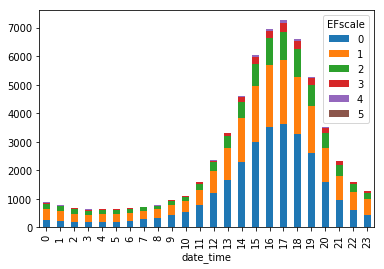

In [94]:
dd2.plot(kind='bar',stacked=True)

### let's normalize between 0 and 1

In [95]:
dd3 = dd2.mul(1./d.groupby(by=[d.index.hour])['om'].count(), axis=0)
dd3.head()

EFscale           0         1         2         3         4   5
date_time                                                      
0          0.293779  0.420507  0.233871  0.043779  0.008065 NaN
1          0.268930  0.463446  0.212794  0.044386  0.010444 NaN
2          0.276720  0.420205  0.238653  0.061493  0.002928 NaN
3          0.287781  0.398714  0.250804  0.056270  0.006431 NaN
4          0.309295  0.435897  0.201923  0.048077  0.004808 NaN

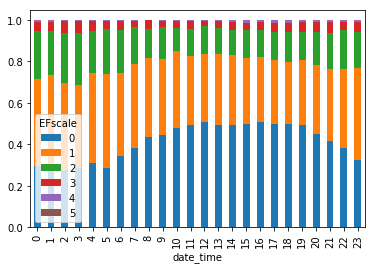

In [96]:
dd3.plot(kind='bar', stacked=True)

### and once again the same analysis but for month of the year

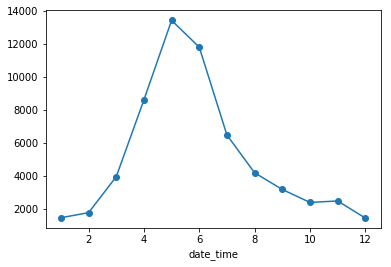

In [97]:
fig, ax = plt.subplots()
d.groupby(d.index.month)['EFscale'].count().plot(kind='line', ax=ax, marker='o')

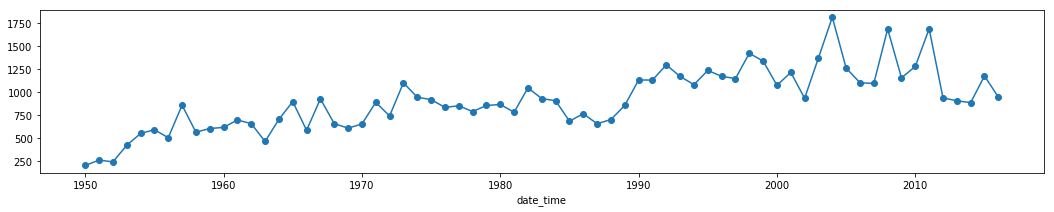

In [98]:
fig, ax = plt.subplots(figsize=(18,3))
d.groupby(d.index.year)['EFscale'].count().plot(kind='line', ax=ax, marker='o')

### once again, you can also create an object and use matplotlib syntax to plot it.

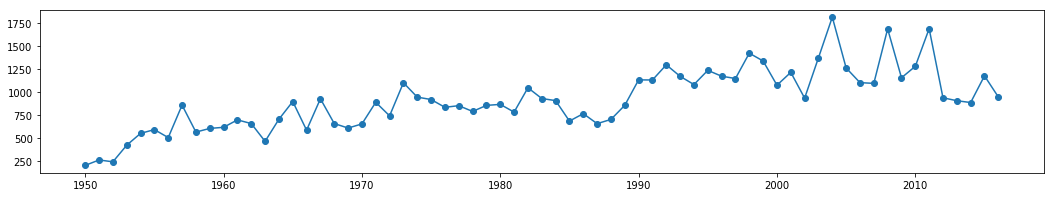

In [100]:
tempd = d.groupby(d.index.year)['EFscale'].count()

fig, ax = plt.subplots(figsize=(18,3))
ax.plot(tempd,'o-')

In [ ]:
tempd.head()

# What else can i do on these groups?

In [ ]:
groupbyobject = d.groupby('EFscale')

# Iterate on groups

python knows how to handle the group within a for loop, and understands what to iterate within.
I have my "groupbyobject" and the first quantity is name (the name of the group, based on the category of your grouping rule) and then the actual group of values.

In [ ]:
for name, group in groupbyobject: 
    # print the name of the group
    print(name)
    # print the data of that group
    print(group.head(3))


In [ ]:
for name, group in groupbyobject: 
    # let's plot the values
    group.plot.hexbin('startlon', 'startlat', cmap='viridis')


# Use your own function with .apply()

In [ ]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

In [ ]:
d['lenghtmiles'].groupby(d['EFscale']).apply(get_stats).unstack()

# .resample()

### what if I want the time series on a different time resolution, 1 month? 1 hour?

In [ ]:
d.resample?

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
d.resample('1m')['om'].count().plot()
d.resample('1M')['om'].count().plot()

check the options for .resample. MS is for month start, and it automatically use the first day of the month. 

In [ ]:
d.resample('1MS')['om'].count().head()

M is for month, and it uses the end. 

In [ ]:
d.resample('1M')['om'].count().head()

the two series seem to be different only in the index

In [ ]:
np.sum(d.resample('1MS')['om'].count().reset_index()-d.resample('1M')['om'].count().reset_index())['om']

In [ ]:
np.sum(d.resample('1MS')['om'].mean().reset_index()-d.resample('1M')['om'].mean().reset_index())['om']

However, it's always important to check "by hand" what you are actually doing, to make sure it is exactly what you want.

Q is for quaterly (three months), but Q uses the end of the month, QS the start of the month. And then you can indicate the starting month (for example for a DJF MAM JJA SON quaterly resampling you want QS-DEC)

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
d.resample('1QS')['om'].count().plot()

please note the different index and in this case, the values don't change because a day of difference doesn't change things

In [ ]:
d.resample('1QS')['EFscale'].mean().head()

In [ ]:
d.resample('1Q')['EFscale'].mean().head()

Starting from december adds an extra year/month preceeding your database (my database start in Jan 1950). But only for the indexing. it does not fill it with values or the average, so you want to discard that

In [ ]:
d.resample('1QS-DEC')['om'].count().head()

let's check - actually note that in this case the interval is inclusive of the last value :) 

In [ ]:
d['1950-03-01':'1950-05-31'].om

In [ ]:
d['1950-03-01':'1950-05-31']['om'].count()


In [ ]:
d['1949-12-01':'1950-02-28']['om'].count()

In [ ]:
d.resample('1Q-DEC')['om'].count().head()

In [ ]:
d['1949-12-31':'1950-03-31']['om'].count()

In [ ]:
d['1950-03-31':'1950-06-30']['om'].count()


so to avoid misunderstanding, always check!

### let's get daily values
my first tornado is on january 3rd, so the time index will start on that dayte

In [ ]:
ddaily = d.resample('1D').count()
print(ddaily.om.head())
print(ddaily.om[0:45].count())

In [ ]:
ddaily.head(15)

# .rolling() 
## allows you to do a rolling mean. however you specify the window of your moving operation. Therefore your data needs to be already on some type of gridded time frame (or maybe not! it depends on your data of course).

in my case I want a 3day rolling sum, therefore I first transform my data in daily valyes, and then I apply .rolling with 3 as a window.

In [ ]:
ddaily.rolling(3).om.sum().head(5)

### what about an odd time window -> pd.Grouper (which is what resample does under the hood)

In [ ]:
ddaily.groupby(pd.Grouper(freq='45D'))['om'].sum()

# Useful list of commands
# https://www.dataquest.io/blog/pandas-cheat-sheet/